# 🚗 Exploratory data analysis

## Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Import data and general info

In [2]:
df_raw = pd.read_csv("../data/raw/car_price_prediction.csv")
df_raw.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

## Analysis

In [4]:
# Numeric columns 
num_cols = df_raw.select_dtypes(include=['int64', 'float64']).columns
df_raw[num_cols].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,45576535.89,936591.42,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,18555.93,190581.27,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2010.91,5.67,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.58,1.20,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.58,4.32,0.0,4.0,6.0,12.0,16.0


In [5]:
# Categorical columns
cat_cols = df_raw.select_dtypes(include=['object', 'category']).columns
df_raw[cat_cols].describe().T

,count,unique,top,freq
Levy,19237,559,-,5819
Manufacturer,19237,65,HYUNDAI,3769
Model,19237,1590,Prius,1083
Category,19237,11,Sedan,8736
Leather interior,19237,2,Yes,13954
Fuel type,19237,7,Petrol,10150
Engine volume,19237,107,2,3916
Mileage,19237,7687,0 km,721
Gear box type,19237,4,Automatic,13514
Drive wheels,19237,3,Front,12874


#### Missing values

In [6]:
missing_values = [None, np.nan, '', '-', 'NA', 'na'] 

null_summary = df_raw.isin(missing_values).sum().sort_values(ascending=False)

# all columns that have missing values
null_summary = null_summary[null_summary > 0]
null_summary


Levy    5819
dtype: int64

In [7]:
df_raw[df_raw['Levy'].isin(missing_values)]['Levy'].value_counts()

Levy
-    5819
Name: count, dtype: int64

#### Features

In [8]:
# rename columns name 
df_raw.columns = (
    df_raw.columns
    .str.lower()           
    .str.replace(' ', '_') 
    .str.replace('.', '')  
)
df_raw.columns

Index(['id', 'price', 'levy', 'manufacturer', 'model', 'prod_year', 'category',
       'leather_interior', 'fuel_type', 'engine_volume', 'mileage',
       'cylinders', 'gear_box_type', 'drive_wheels', 'doors', 'wheel', 'color',
       'airbags'],
      dtype='object')

In [9]:
# Remove ID and Levy (a lot of missing values) as irrelevante features
features = [
    'price', 
    'manufacturer', 
    'model', 
    'prod_year', 
    'category',
    'leather_interior', 
    'fuel_type', 
    'engine_volume', 
    'mileage',
    'cylinders', 
    'gear_box_type', 
    'drive_wheels', 
    'doors', 
    'wheel', 
    'color',
    'airbags'
]
df = df_raw[features].copy()

#### Numerical features

In [10]:
# Those columns should be numerical and 
# we should preprocessed them.
numerical_features = [
    'prod_year',
    'mileage',
    'engine_volume',
    'cylinders',
    'airbags',
    'price', 
    'doors'
]
df[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   prod_year      19237 non-null  int64  
 1   mileage        19237 non-null  object 
 2   engine_volume  19237 non-null  object 
 3   cylinders      19237 non-null  float64
 4   airbags        19237 non-null  int64  
 5   price          19237 non-null  int64  
 6   doors          19237 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.0+ MB


In [11]:
df['doors'] = (
    df['doors']
    .replace({'04-May': 4, '02-Mar': 2, '>5': 5})
    .astype('Int64')  # ili int ako nema NaN vrednosti
)

/var/folders/d7/zy34vlxx3q91d27zhsx8y5kw0000gq/T/ipykernel_96326/1962657983.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'04-May': 4, '02-Mar': 2, '>5': 5})


In [12]:
# Remove 'km' from mileage and set int type
df['mileage'] = df['mileage'].str.replace(' km', '').astype(int)

In [13]:
df['is_Turbo'] = df['engine_volume'].apply(lambda x: 'Yes' if 'Turbo' in str(x) else 'No')
df['engine_volume'] = df['engine_volume'].str.replace(' Turbo', '').astype(float)

In [14]:
df[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   prod_year      19237 non-null  int64  
 1   mileage        19237 non-null  int64  
 2   engine_volume  19237 non-null  float64
 3   cylinders      19237 non-null  float64
 4   airbags        19237 non-null  int64  
 5   price          19237 non-null  int64  
 6   doors          19237 non-null  Int64  
dtypes: Int64(1), float64(2), int64(4)
memory usage: 1.0 MB


In [15]:
def visualize_outliers(df, col, factor=1.5, min_value=-np.inf, max_value=np.inf, 
                       hue=None, bins=30, scale=1, percentile_cutoff=None):
    """
    Visualization of distribution with histogram + KDE curve and IQR limits.
    Optional scaling (e.g. mileage/1000 for thousands of km).
    You can also limit with min_value, max_value or percentile_cutoff.
    """
    # Skaliranje
    data_scaled = df[col] / scale

    # Opcioni cutoff po percentilu
    if percentile_cutoff is not None:
        cutoff_val = data_scaled.quantile(percentile_cutoff)
        data_scaled = data_scaled[data_scaled <= cutoff_val]

    # Opcioni cutoff po min/max
    data_scaled = data_scaled[(data_scaled >= min_value/scale) & (data_scaled <= max_value/scale)]

    # Računaj IQR na filtriranom setu
    Q1 = data_scaled.quantile(0.25)
    Q3 = data_scaled.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = max(Q1 - factor * IQR, min_value/scale)
    upper_bound = min(Q3 + factor * IQR, max_value/scale)

    plt.figure(figsize=(10, 5))

    sns.histplot(data=data_scaled, bins=bins, kde=True, alpha=0.6)

    plt.axvline(lower_bound, color="green", linestyle="--", label=f"Lower bound = {lower_bound:.2f}")
    plt.axvline(upper_bound, color="orange", linestyle="--", label=f"Upper bound = {upper_bound:.2f}")

    plt.title(f"Distribution of {col} (scaled by {scale}) with Outlier Bounds (factor={factor})")
    plt.legend()
    plt.show()

    num_outliers = ((df[col]/scale < lower_bound) | (df[col]/scale > upper_bound)).sum()
    print(f"{col}: Identified {num_outliers} outliers (after scaling)")

    
    
def drop_outliers(df, col, factor=1.5, min_value=-np.inf, max_value=np.inf):
    """
    Removes outliers based on IQR limits and returns a cleaned DataFrame.
    """
    df_clean = df.copy()

    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = max(Q1 - factor * IQR, min_value)
    upper_bound = min(Q3 + factor * IQR, max_value)

    mask_outliers = (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)
    num_outliers = mask_outliers.sum()

    df_clean = df_clean.loc[~mask_outliers].reset_index(drop=True)

    print(f"{col}: Dropped {num_outliers} outliers")
    print(f"New dataset shape: {df_clean.shape}")

    return df_clean
    


##### Prod. year

In [16]:
print(np.sort(df['prod_year'].unique()))

[1939 1943 1947 1953 1957 1964 1965 1968 1973 1974 1976 1977 1978 1980
 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]


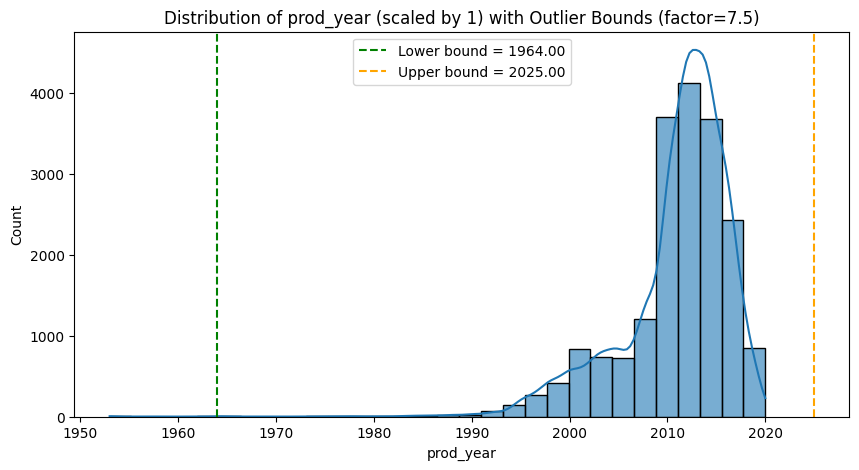

prod_year: Identified 10 outliers (after scaling)


In [17]:
visualize_outliers(df, 'prod_year', factor=7.5, min_value=1950, max_value=2025)

In [18]:
df = drop_outliers(df, 'prod_year', factor=7.5, min_value=1950, max_value=2025)

prod_year: Dropped 10 outliers
New dataset shape: (19227, 17)


##### Mileage

In [19]:
df['mileage'].describe(percentiles=[0.99]).apply(lambda x: f"{x:,.2f}")

count           19,227.00
mean         1,532,972.38
std         48,416,445.06
min                  0.00
50%            126,000.00
99%            571,267.44
max      2,147,483,647.00
Name: mileage, dtype: object

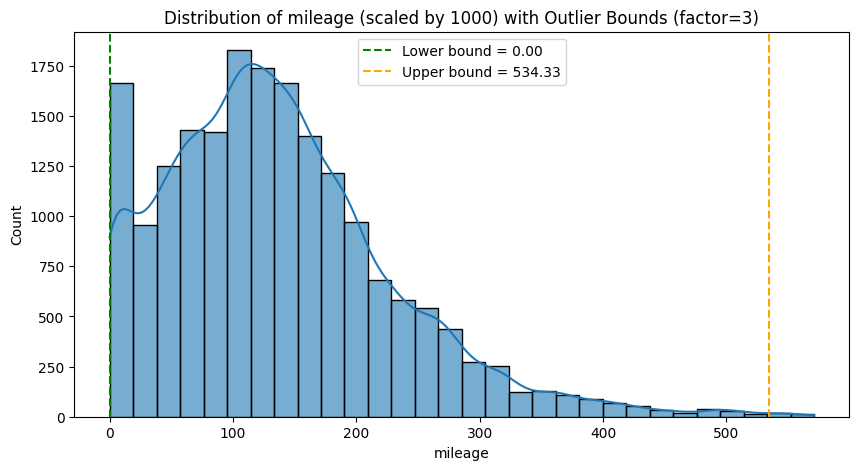

mileage: Identified 225 outliers (after scaling)


In [20]:
# Skalirano na hiljade, i prikazano samo do 99. percentila
visualize_outliers(df, 'mileage', factor=3, min_value=0, scale=1000, percentile_cutoff=0.99)


In [21]:
df = drop_outliers(df, 'mileage', factor=3)

mileage: Dropped 214 outliers
New dataset shape: (19013, 17)


##### Engine volume

In [22]:
df['engine_volume'].describe()

count    19013.000000
mean         2.310156
std          0.879608
min          0.000000
25%          1.800000
50%          2.000000
75%          2.500000
max         20.000000
Name: engine_volume, dtype: float64

In [23]:
df['engine_volume'].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [24]:
df['is_Turbo'].value_counts()

is_Turbo
No     17099
Yes     1914
Name: count, dtype: int64

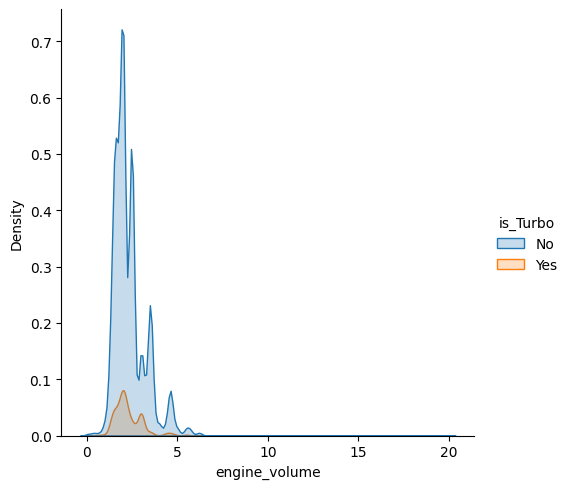

In [25]:
sns.displot(data=df, x="engine_volume", hue="is_Turbo", kind="kde", fill=True)
plt.show()

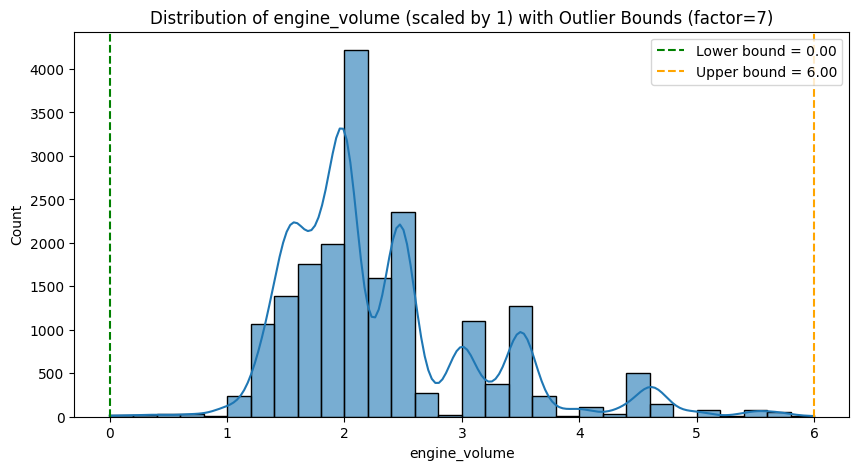

engine_volume: Identified 38 outliers (after scaling)


In [26]:
visualize_outliers(df, 'engine_volume', factor=7, min_value=0, max_value=6)

In [27]:
df = drop_outliers(df, 'engine_volume', factor=7, min_value=0, max_value=6)

engine_volume: Dropped 38 outliers
New dataset shape: (18975, 17)


##### Cylinders

In [28]:
df['cylinders'].describe()

count    18975.000000
mean         4.579710
std          1.191198
min          1.000000
25%          4.000000
50%          4.000000
75%          4.000000
max         16.000000
Name: cylinders, dtype: float64

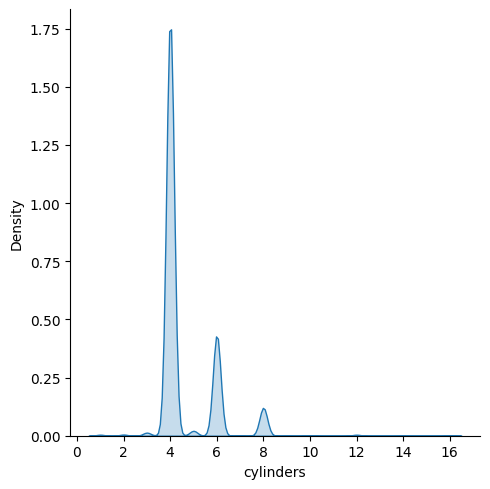

In [29]:
sns.displot(data=df, x="cylinders", kind="kde", fill=True)
plt.show()

##### Airbags

In [30]:
print(df['airbags'].describe(percentiles=[0.25, 0.5, 0.75, 0.99]))
print

count    18975.000000
mean         6.599789
std          4.324368
min          0.000000
25%          4.000000
50%          6.000000
75%         12.000000
99%         12.000000
max         16.000000
Name: airbags, dtype: float64


<function print>

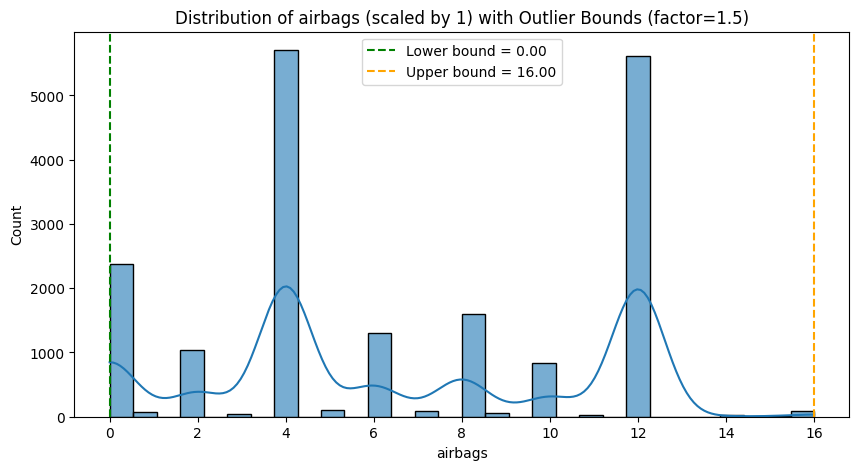

airbags: Identified 0 outliers (after scaling)


In [31]:
visualize_outliers(df, 'airbags', min_value=0, max_value=16)

##### Price

count        18,975.00
mean         18,618.59
std         191,828.74
min               1.00
25%           5,331.00
50%          13,172.00
75%          22,344.50
max      26,307,500.00
Name: price, dtype: object


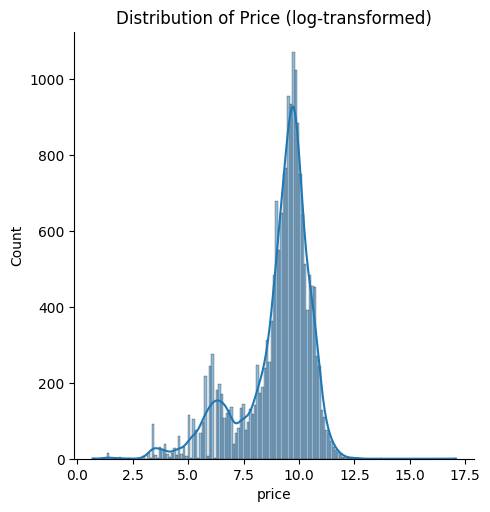

In [32]:
print(df['price'].describe().apply(lambda x: f"{x:,.2f}"))
sns.displot(df['price'].apply(lambda x: np.log1p(x)), kde=True)
plt.title("Distribution of Price (log-transformed)")
plt.show()

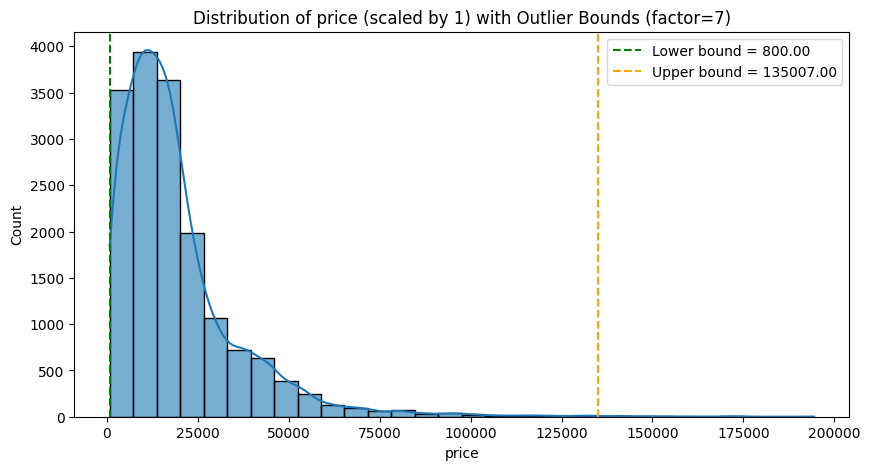

price: Identified 2325 outliers (after scaling)


In [33]:
visualize_outliers(df, 'price', factor=7, min_value=800, max_value=200_000)

In [34]:
df = drop_outliers(df, 'price', factor=7, min_value=800, max_value=200_000)

price: Dropped 2316 outliers
New dataset shape: (16659, 17)


##### Correlation 

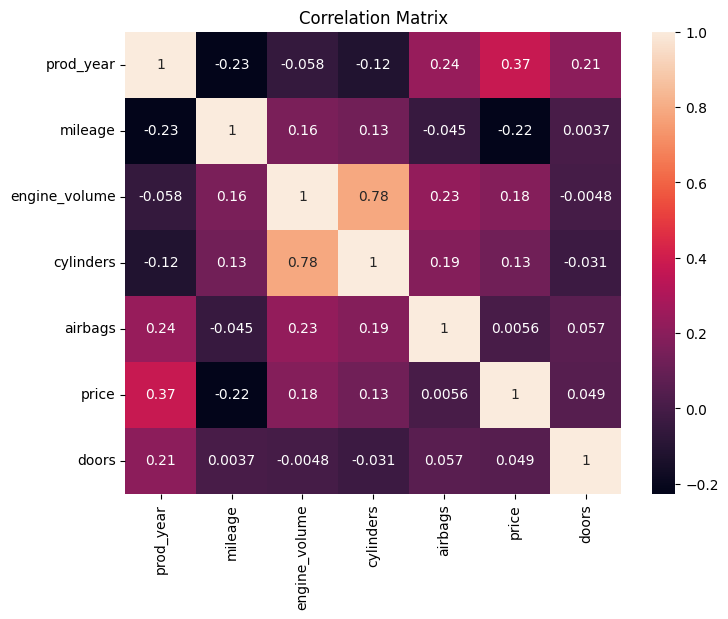

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_features].corr(),annot=True, cbar = True)
plt.title('Correlation Matrix')
plt.show()

📌  Engine volume and Cylinders has quite strong relationship which is 0.78 not that suprising that the cars have more cylinders have more engine volume and Levy.

#### Categorical features

##### Manufacturer

In [36]:
col = "manufacturer"
print(df[col].unique())
df[col].value_counts().sort_values(ascending=True)

['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'GMC' 'FIAT' 'SUBARU' 'INFINITI'
 'ALFA ROMEO' 'SUZUKI' 'MAZDA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'ACURA' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'VOLVO' 'სხვა' 'HAVAL'
 'HUMMER' 'SCION' 'MERCURY' 'ZAZ' 'ROVER' 'UAZ' 'SEAT' 'LANCIA' 'FERRARI'
 'MASERATI' 'SAAB' 'PONTIAC' 'SATURN' 'ASTON MARTIN' 'GREATWALL']


manufacturer
HAVAL               1
FERRARI             1
TESLA               1
GREATWALL           1
ASTON MARTIN        1
                 ... 
FORD              955
CHEVROLET         972
MERCEDES-BENZ    1695
TOYOTA           3016
HYUNDAI          3472
Name: count, Length: 61, dtype: int64

In [37]:
col = "manufacturer"
rare_cats = df[col].value_counts()[df[col].value_counts().isin(range(1,4))].index
num_removed = df[df[col].isin(rare_cats)].shape[0]
df = df[~df[col].isin(rare_cats)].reset_index(drop=True)
print(f"Removed {num_removed} rows with rare categories (appearing only once, twice or three times).")

Removed 22 rows with rare categories (appearing only once, twice or three times).


##### Model

In [38]:
col = "model"
df[col].value_counts().sort_values(ascending=True)

model
C 240 W 203                   1
Cruze LT RS                   1
CHR Limited                   1
Focus ST                      1
Every Landy NISSAN SEREN      1
                           ... 
Santa FE                    523
Camry                       737
Elantra                     854
Prius                       868
Sonata                      880
Name: count, Length: 1514, dtype: int64

In [39]:
col = "model"
rare_model = df[col].value_counts()[df[col].value_counts() == 1].index
num_removed = df[df[col].isin(rare_model)].shape[0]
df = df[~df[col].isin(rare_model)].reset_index(drop=True)
print(f"Removed {num_removed} rows with rare categories (appearing only once).")

Removed 903 rows with rare categories (appearing only once).


##### Category
    

In [40]:
col = "category"
df[col].value_counts().sort_values(ascending=True)

category
Limousine         5
Cabriolet        21
Pickup           36
Goods wagon     202
Microbus        260
Universal       334
Coupe           420
Minivan         579
Hatchback      2278
Jeep           4488
Sedan          7111
Name: count, dtype: int64

##### Leather interior

In [41]:
col = "leather_interior"
df[col].value_counts()

leather_interior
Yes    11188
No      4546
Name: count, dtype: int64

##### Fuel type 
   

In [42]:
col = "fuel_type"
df[col].value_counts()

fuel_type
Petrol            8223
Diesel            3593
Hybrid            2655
LPG                754
CNG                431
Plug-in Hybrid      77
Hydrogen             1
Name: count, dtype: int64

In [43]:
rare_type = df[col].value_counts()[df[col].value_counts() == 1].index
num_removed = df[df[col].isin(rare_type)].shape[0]
df = df[~df[col].isin(rare_type)].reset_index(drop=True)
print(f"Removed {num_removed} rows with rare type (appearing only once).")

Removed 1 rows with rare type (appearing only once).


#####  Gear box type

In [44]:
col = "gear_box_type"
df[col].value_counts()

gear_box_type
Automatic    10860
Tiptronic     2653
Manual        1547
Variator       673
Name: count, dtype: int64

##### Drive wheels

In [45]:
df['drive_wheels'].value_counts()

drive_wheels
Front    10987
4x4       2971
Rear      1775
Name: count, dtype: int64

##### Wheel

In [46]:
df['wheel'].value_counts()

wheel
Left wheel          14534
Right-hand drive     1199
Name: count, dtype: int64

##### Color

In [47]:
df['color'].value_counts()

color
Black            4006
White            3680
Silver           3229
Grey             1919
Blue             1150
Red               518
Green             259
Orange            172
Carnelian red     155
Brown             149
Golden            130
Beige             107
Sky blue          106
Yellow             98
Purple             34
Pink               21
Name: count, dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15733 entries, 0 to 15732
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             15733 non-null  int64  
 1   manufacturer      15733 non-null  object 
 2   model             15733 non-null  object 
 3   prod_year         15733 non-null  int64  
 4   category          15733 non-null  object 
 5   leather_interior  15733 non-null  object 
 6   fuel_type         15733 non-null  object 
 7   engine_volume     15733 non-null  float64
 8   mileage           15733 non-null  int64  
 9   cylinders         15733 non-null  float64
 10  gear_box_type     15733 non-null  object 
 11  drive_wheels      15733 non-null  object 
 12  doors             15733 non-null  Int64  
 13  wheel             15733 non-null  object 
 14  color             15733 non-null  object 
 15  airbags           15733 non-null  int64  
 16  is_Turbo          15733 non-null  object

In [49]:
df.to_csv('../data/processed/car_data_processed.csv')